In [2]:
# Re-create the 3 dataframes from saved .csv files

import pandas as pd

# Pull in the citybikes .csv for Vancouver
bikes_df = pd.read_csv('../data/citybikes_vancouver.csv')

# Need to pull each of the 3 partitions from 3 .csv files, into a singular dataframe for Yelp
partition1_df = pd.read_csv('../data/yelp_vancouver_partition1.csv')
partition2_df = pd.read_csv('../data/yelp_vancouver_partition2.csv')
partition3_df = pd.read_csv('../data/yelp_vancouver_partition3.csv')

yelp_df = pd.concat([partition1_df, partition2_df, partition3_df], ignore_index=True)

# Load FSQ .csv files, into a singular dataframe for Foursquare
fsq_df = pd.read_csv('../data/fsq_vancouver.csv')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

#### Julie's Notes:  Data Joining Considerations

We have 3 dataframes with 1 common key (citybikes station id) between them:

1. bikes_df
    - Showing 245 bike stations around the city of Vancouver, their latitude & longitudes, and number of bikes available for rent at that station


2. yelp_df
    - Yelp information showing listing of points of interest in the following groupings, per bike station (within 1000m of bike station):
        - "Outdoor": Points of Interest tagged any of: beach, park, bicyclepaths, mountainbiking
        - "Museum" : Points of Interest tagged as: museum
        - "Accommodations": Places that tourists who do not own their own bikes would be staying, businesses tagged as: hotel, hostel


3. fsq_df
    - Foursquare information showing listing of points of interest in the following groupings, per bike station (within 1000m) of bike station:
        - "Sightseeing": Points of interest tagged any of: 10027, 10047, 10059, 10069 (Museum, Public Art, Street Art, Outdoor Sculpture)
        - "Snack": Businesses that someone cycling may want to stop to have a quick refreshment, tagged with: 13032 (Cafe/Coffee/Tea House)
        - "Outdoor": Points of interest tagged any of: 16003, 16020, 16046 (Beach, Historic/Protected Site, Scenic Lookout)
        - "Biketrail": Features that a cyclist would want to ride comfortably, tagged: 16004 (Bike Trail)
        - "Park": Features that a cyclist would want to ride through, see, stop and enjoy, tagged: 16032 (Park)
        - "Accommodations": Places that tourists who do not own their own bikes would be staying, businesses tagged as: 19010, 19013, 19014, 19019 (B&B, Hostel, Hotel, Vacation Rental)

##### What Joins Will Be Done?

1. **yelp_dfmodel** and **fsq_dfmodel**:  It does not make sense to join the yelp_df with the fsq_df "as is" ON station_id, because we would get a cartesian product that does not make sense to be combined, and numerous repeated cells.  It **does** makes sense to join the yelp_df with fsq_df after each of these datasets has been reshaped using a pivot to spread rows into columns and doing a count of number of each of the above categories, when there is only 1 row per station_id.

2. **yelp_poi_bikes_df** and **fsq_poi_bikes_df**:  It makes sense to join the bikes_df with yelp_df, and join bikes_df with fsq_df, creating 2 separate dataframes.  Each of these will show all the POIs associated to (within 1000m of) each bike station, for each of Yelp data and Foursquare data.


Data Cleaning will also be done on the "yelp_fsq_poi_bikes_df" and "fsq_poi_bikes_df" dataframes at the tail end of that join exercise.

In [12]:
# First create the easy part:
# 1) join bikes_df with yelp_df ON bikes_df.id = yelp_df.station_id
# 2) join bikes_df with fsq_df ON bikes_df.id = fsq_df.station_id

yelp_poi_bikes_df = pd.merge(bikes_df, yelp_df, left_on='id', right_on='station_id', suffixes=['_b', '_y'])
fsq_poi_bikes_df = pd.merge(bikes_df, fsq_df, left_on='id', right_on='station_id', suffixes=['_b', '_f'])

# Do some column renames and column drops to make the entire dataset make better sense
yelp_poi_bikes_df.drop(columns=['station_id'], inplace=True)
yelp_poi_bikes_df.rename(columns={'id':'station_id', 'name_b':'station_name', 'name_y':'place_name'}, inplace=True)

fsq_poi_bikes_df.drop(columns=['station_id'], inplace=True)
fsq_poi_bikes_df.rename(columns={'id':'station_id', 'name_b':'station_name', 'name_f':'place_name'}, inplace=True)


Julie's notes: #2 (above) for Yelp: Join to make yelp_poi_bikes_df

In [4]:
yelp_poi_bikes_df.shape

(6684, 17)

In [10]:
yelp_poi_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id        6684 non-null   object 
 1   station_name      6684 non-null   object 
 2   slots             6684 non-null   int64  
 3   lat               6684 non-null   float64
 4   long              6684 non-null   float64
 5   place_id          6684 non-null   object 
 6   place_name        6684 non-null   object 
 7   distance          6684 non-null   float64
 8   address           6644 non-null   object 
 9   city              6684 non-null   object 
 10  postal            6659 non-null   object 
 11  review_count      6684 non-null   float64
 12  rating            6684 non-null   float64
 13  category_id       6684 non-null   object 
 14  category_name     6684 non-null   object 
 15  query_categories  6684 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [11]:
yelp_poi_bikes_df.head()

station_id   station_name  slots        lat  \
0  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
1  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
2  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
3  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
4  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   

         long                place_id            place_name    distance  \
0 -123.114397  oCNy5AtXUagtQQQo0vqAtw        Charleson Park  898.103788   
1 -123.114397  E43R3DuzaKD05c-Ngv-4Nw  Jonathan Rogers Park  508.529025   
2 -123.114397  -65-OqxIBL4qdTN5PA-svw   Mount Pleasant Park  839.272310   
3 -123.114397  tI70Wf2bTa2eH2rURHYp5Q   Major Matthews Park  536.277037   
4 -123.114397  4nhH7mC7OGBRTu-9WSOmJw           Willow Park  613.410607   

                address       city   postal  review_count  rating  \
0  999 Charleson Street  Vancouver      V5Z          20.0     4.5   
1        110 7 Avenue W  Vancouver  V5Y 1L7          11.0     4.5   
2   3161 Ontario Street  Vancouver  V5T 2Z1           4.0     5.0   
3  2627 Manitoba Street  Vancouver  V5Y 3A9           1.0     5.0   
4      802 W 7th Avenue  Vancouver  V5Z 1C1           1.0     4.0   

         category_id      category_name  \
0  parks|playgrounds  Parks|Playgrounds   
1              parks              Parks   
2  parks|playgrounds  Parks|Playgrounds   
3              parks              Parks   
4              parks              Parks   

                            query_categories  
0  beaches,parks,bicyclepaths,mountainbiking  
1  beaches,parks,bicyclepaths,mountainbiking  
2  beaches,parks,bicyclepaths,mountainbiking  
3  beaches,parks,bicyclepaths,mountainbiking  
4  beaches,parks,bicyclepaths,mountainbiking

Julie's Notes: Investigating null values for address and postal in resulting Yelp dataset

In [22]:
yelp_empty_address = yelp_poi_bikes_df[yelp_poi_bikes_df['address'].isna()]
print (f"Places where address is null:\n{yelp_empty_address.groupby('place_name').size()}")

yelp_empty_postal = yelp_poi_bikes_df[yelp_poi_bikes_df['postal'].isna()]
print (f"\nPlaces where postal is null:\n{yelp_empty_address.groupby('place_name').size()}")

Places where address is null:
place_name
McAuley Park         23
Vancouver Seawall    17
dtype: int64

Places where postal is null:
place_name
McAuley Park         23
Vancouver Seawall    17
dtype: int64


From the above, it's not a big deal that the postal and address is empty for these 2 places.  In fact, I probably won't even need the address or postal for my future model building.

Julie's notes: #2 (above) for Foursquare:  join to make fsq_poi_bikes_df

In [13]:
fsq_poi_bikes_df.shape

(18007, 15)

In [14]:
fsq_poi_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18007 entries, 0 to 18006
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_id           18007 non-null  object 
 1   station_name         18007 non-null  object 
 2   slots                18007 non-null  int64  
 3   lat                  18007 non-null  float64
 4   long                 18007 non-null  float64
 5   place_id             18007 non-null  object 
 6   place_name           18007 non-null  object 
 7   distance             18007 non-null  float64
 8   address              16338 non-null  object 
 9   city                 17729 non-null  object 
 10  postal               14364 non-null  object 
 11  category_id          18007 non-null  object 
 12  category_name        18007 non-null  object 
 13  query_categories     18007 non-null  object 
 14  query_category_text  18007 non-null  object 
dtypes: float64(3), int64(1), object(11)


In [15]:
fsq_poi_bikes_df.head()

station_id   station_name  slots        lat  \
0  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
1  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
2  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
3  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
4  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   

         long                  place_id         place_name  distance  \
0 -123.114397  5583141f498eb130f5b54df6     Trans Am Totem     311.0   
1 -123.114397  532cd663498ee59ab1496004  eatART Foundation    3020.0   
2 -123.114397  4b1db335f964a520211424e3      Marulilu Cafe      96.0   
3 -123.114397  4c75baefdb52b1f7c5b979dc   Caffe Cittadella     336.0   
4 -123.114397  4aec909ff964a520ccc821e3      Milano Coffee     430.0   

                       address       city   postal  category_id  \
0            1283 Pacific Blvd  Vancouver  V6Z 2R6        10047   
1  180A 577 Great Northern Way  Vancouver      NaN        10047   
2              451W Broadway W  Vancouver  V5Y 1R4  13034|13263   
3                  2310 Ash St  Vancouver  V5Z 3C2  13035|13065   
4                156 8th Ave W  Vancouver  V5Y 1N2  13035|13065   

              category_name         query_categories  \
0                Public Art  10027,10047,10059,10069   
1                Public Art  10027,10047,10059,10069   
2  Café|Japanese Restaurant                    13032   
3    Coffee Shop|Restaurant                    13032   
4    Coffee Shop|Restaurant                    13032   

                               query_category_text  
0        Arts and Entertainment: Museum|Public Art  
1        Arts and Entertainment: Museum|Public Art  
2  Dining and Drinking: Cafe, Coffee and Tea House  
3  Dining and Drinking: Cafe, Coffee and Tea House  
4  Dining and Drinking: Cafe, Coffee and Tea House

Julie's Notes: Investigating null values for address, city and postal for Foursquare dataset

In [58]:
pd.set_option("display.max_rows", None)

fsq_empty_address = fsq_poi_bikes_df[fsq_poi_bikes_df['address'].isna()]
print (f"Places where address is null:\n{fsq_empty_address.groupby('place_name').size()}")

fsq_empty_postal = fsq_poi_bikes_df[fsq_poi_bikes_df['postal'].isna()]
print (f"\nPlaces where postal is null:\n{fsq_empty_address.groupby('place_name').size()}")

fsq_empty_city = fsq_poi_bikes_df[fsq_poi_bikes_df['city'].isna()]
print (f"\nPlaces where city is null:\n{fsq_empty_address.groupby('place_name').size()}")

pd.reset_option("display.max_rows")

Places where address is null:
place_name
Alice Townley Park                                      17
Arbutus Village Park                                     2
BC Water Bikes                                          21
Britannia Secondary School Playground                   14
Brockton Oval                                            3
Burrard Beach                                           24
Cadero Park                                             23
Caffe di Beppe                                          22
Cardero Park                                            22
Celebration Pavilion                                     5
Ceperley Meadow                                          8
Ceperley Playground                                      9
Chessboard Traffic Island                               20
China Creek Skate Park                                  17
China Town Dog Park                                     29
Chinatown Heritage Alley - Allan Yip Circle             26
Chinatown Memor

In [71]:
# Investigating 'city' makeup
fsq_poi_bikes_df['city'].unique()

array(['Vancouver', 'Burnaby', nan, 'Iskut', 'Kitchener', 'Vernon',
       'North Vancouver', 'Thetis Island', 'Richmond'], dtype=object)

In [78]:
# Look at the Places Names and Address for rows with cities in ['Iskut', 'Kitchener', 'Vernon', 'Thetis Island]
fsq_poi_bikes_df[fsq_poi_bikes_df['city'].isin(['Iskut', 'Kitchener', 'Vernon', 'Thetis Island'])]
#fsq_poi_bikes_df[fsq_poi_bikes_df['city'].isin(['Iskut', 'Kitchener', 'Vernon', 'Thetis Island'])].groupby(['place_name', 'address']).size()

station_id              station_name  slots  \
357    66f873d641d448bd1572ab086665a458  12th & Yukon (City Hall)     16   
408    485d4d24c803cfde829ab89699fed833                 8th & Ash     16   
603    d1c9556d92f329703229fb3e33899a3b            Stamps Landing     14   
3799   b9fd847d53fe45658fee4c46e7f562b8        Cypress & Cornwall     22   
3887   c2be5403b1c101e8032cf6696457200e            Anderson & 2nd     28   
4173   686c0fdb962e26e274d81fc286c010dd             14th & Cambie     14   
4262   0cf6cd1809fa7f510812f5b052f578c4             Ontario & 5th     20   
4301   93c88a18c673e2c72a6afa93d6b89f18               10th & Main     18   
4346   93c88a18c673e2c72a6afa93d6b89f18               10th & Main     18   
4422   8fb5ce1e34ad31de940481953aea452c             Cypress & 4th     18   
4458   aa704bfba40286bd0661b64d1f75e778               Vanier Park     28   
4799   fbb4c06b719596c21f91fd51ef6d4710             7th & Heather     18   
4882   72c1049dfbbde7c24ec45c14f1a5ee85            Harwood & Bute     20   
5546   625a2ad202275c8e2be3ce868e85b105            Heather & 14th     16   
5615   6c0de983fb47a3439a9e3c36a3d15804             8th & Ontario     16   
5651   92c9e62c0b42adf4759c430009d3987a            1st & Chestnut     26   
5869   4cb84c9a3743287019ae00ceef9a1cd3                10th & Oak     30   
6326   0d1b5c62f8d22e3650811df55596e25b            Heather & 16th     12   
6367   521c2122c791ed038168c3b8ff24061b            14th & Ontario     16   
6422   838d5bb59963474ad08a6d5b156943ed               14th & Main     14   
6644   9ec4163496363b31ab475cb851b57b21           Beach & Seymour     18   
6903   b9baf685b7053de899bf3467f61c2781             Burrard & 4th     16   
7137   2f09a64507cf6257c67ca20af27339eb       Chestnut & McNicoll     16   
7549   6526a2eb3832f9ba0224d237e901ea5b      Kitsilano Beach Park     36   
7599   e44c2235dd603dbee54fe08f7543e85a        Arbutus & McNicoll     30   
8041   35eb539fb9298bb7e4f6759ca0256505            10th & Ontario     20   
8059   35eb539fb9298bb7e4f6759ca0256505            10th & Ontario     20   
8232   b30ed0719dd281867a4d39779c78b58a           Columbia & 14th     14   
8376   ace20c241ee38643c9060f290b215b9d              7th & Laurel     14   
8954   707c1c54e0278fbae5d0ae3c42a25b71              8th & Scotia     12   
10229  e1ff428dadc7c32141b9d89a7b56728a           Glen & Broadway     18   
10273  012d3e06901cc222b1c2cf0a2ace3a29      St George & Broadway     14   
10496  1bca0e944a4faf170db82793414b03ab               18th & Main     16   
10552  d0782213f003ce9eb276fbceff44f1f4      Prince Edward & 16th     14   
10612  1ef01f2f89621d51afbabaa6296e55be      Prince Edward & 14th     14   
10675  c47a1f62ea461ce1c9f3e2478c657df6          13th & St George     16   
10740  0cee06d7d10f7d3162cea03d22b7beed             10th & Fraser     14   
10792  f62bc2bfe9a0a563d5b6745ce6d962ba              8th & Fraser     16   
10819  1c8f7fd6535db12cc45cfc59aa9da058      St Catherines & 10th     12   
10858  17a3320a52bcc62161908967f8a06613       St Catherines & 7th     20   
11064  d02e2eaafda91425eddd24d8acd328ab            Windsor & 14th     14   
11094  08c7a90bf297fde8c1f1156db13987d4             14th & Fraser     16   
11278  dcf3d5c9f1b3a46f0ef2eb2247931f89       6th & Prince Edward     16   
11648  4ac99b928a91d8ccb785c9d0b805adb6           10th & Kingsway     20   
11774  99c81f71db35911c79a86a1c5edc5604            Beach & Hornby     22   
12172  9130f9aa3bb037a04c17e6f2630327e5               8th & Yukon     22   
12915  06487275cd19694152824c7c3088e8ff   Olympic Village Station     26   
13108  a6aec7b8c25da4c02829cd7839b8933d            Aquatic Centre     40   
13181  c924f6a41b130fad49cfae47271314bc         Beach & Broughton     22   
13283  8e93d0da1ee6caadf21ed9575b5fa9da           Beach & Cardero     22   
13529  7ed043a19e6a4ece742fe747b663bdbf            Columbia & 5th     18   
13705  2781435bde344e1b64f1bebac6bc9008            Ontario & 16th     14   
1

From the above, it's not a big deal that the postal and address is empty for these 2 places.  In fact, I probably won't even need the address or postal for my future model building.
It is disturbing that there are so many incorrect cities listed.  Data Cleaning needs to be done for the data associated to those erroneous cities, per above. 

This is the summary of what should be done:
1. Tatogga Lake Resort, according to Google (https://www.google.com/maps/place/Tatogga+Lake+Resort/@58.1276424,-131.4748196,7.5z/data=!4m6!3m5!1s0x53f78e3696868cad:0x19fd99e67501297!8m2!3d57.7111781!4d-129.9915061!16s%2Fg%2F11cm032hww?entry=ttu), is located at 57.78,-129.65 in Northern BC.  The rows showing Tatogga Lake should be dropped from the dataset so as not to erroneously skew the numbers/regression.
2. Vanier Park, according to Google (https://www.google.com/maps/place/Vanier+Park/@49.277288,-123.1435496,15z/data=!4m6!3m5!1s0x548673ccd4ab4871:0x828241240cdc4505!8m2!3d49.277288!4d-123.1435496!16s%2Fm%2F04q3dqp?entry=ttu) is a valid park in Vancouver.  The rows with this data should have the address specified as 'N/A', city corrected to 'Vancouver' nad leave the postal code as is ('NaN')
3. Lil Durk does not appear to be a cafe in Vancouver.  The rows showing "Lil Durk" should be dropped from the dataset so as not to erroneously skew the numbers/regression.
4. Vancouver Best Golf Resorts does not appear to be a hotel in Vancouver (it is listed here as located in "Thetis Island")  Rows with this entry should be dropped.

In [141]:
# Perform the data cleaning highlighted upon analysis above.

# 1
fsq_poi_bikes_df = fsq_poi_bikes_df.drop(fsq_poi_bikes_df[fsq_poi_bikes_df['place_name']=='Tatogga Lake Resort'].index)

#2
filt = fsq_poi_bikes_df['place_name'] == 'Vanier Park'
fsq_poi_bikes_df.loc[filt, 'address'] = 'N/A'
fsq_poi_bikes_df.loc[filt, 'city'] = 'Vancouver'

#3
fsq_poi_bikes_df = fsq_poi_bikes_df.drop(fsq_poi_bikes_df[fsq_poi_bikes_df['place_name']=='Lil Durk'].index)

#4
fsq_poi_bikes_df = fsq_poi_bikes_df.drop(fsq_poi_bikes_df[fsq_poi_bikes_df['place_name']=='Vancouver Best Golf Resorts'].index)

print (fsq_poi_bikes_df.shape[0])

17961


Julie's Notes: #1 above for Yelp
- Pivot the data in yelp_df such that we have a count of number of the each type of POI (a count for number of "Outdoor" POIs, number of "Museum" POIs, number of "Accommodations" POIs), per bike station_id
- Also want to create a new column showing minimum distance to the nearest (any type of) POI for each station

In [79]:
yelp_df.head()

station_id                place_id  \
0  00fa94ad698dc4a9e4d708d6fd32f294  kajMc2fkWKdzKJ1M4pm47Q   
1  00fa94ad698dc4a9e4d708d6fd32f294  VoziJj_Fw67OtZtdDzrpQg   
2  00fa94ad698dc4a9e4d708d6fd32f294  XHJTdq8QJp6_9oCj5hU85w   
3  00fa94ad698dc4a9e4d708d6fd32f294  EGZABxCmlA3PNwbSYXhLbA   
4  00fa94ad698dc4a9e4d708d6fd32f294  AVulOVkLG2LIRaOdOAmdlA   

                     name    distance                  address       city  \
0            Stanley Park  978.386841  1166 Stanley Park Drive  Vancouver   
1  English Bay Beach Park  783.428693        1700 Beach Avenue  Vancouver   
2       Vancouver Seawall  663.404115                      NaN  Vancouver   
3             Morton Park  426.335401       1800 Morton Avenue  Vancouver   
4             Lost Lagoon  328.531508                Lagoon Dr  Vancouver   

    postal  review_count  rating   category_id category_name  \
0      V6G        1091.0     5.0         parks         Parks   
1  V6E 1V3          68.0     4.5         parks         Parks   
2      NaN         101.0     5.0  hiking|parks  Hiking|Parks   
3  V6G 1Z1          14.0     4.5         parks         Parks   
4      V6G          18.0     4.5   parks|lakes   Parks|Lakes   

                            query_categories  
0  beaches,parks,bicyclepaths,mountainbiking  
1  beaches,parks,bicyclepaths,mountainbiking  
2  beaches,parks,bicyclepaths,mountainbiking  
3  beaches,parks,bicyclepaths,mountainbiking  
4  beaches,parks,bicyclepaths,mountainbiking

In [81]:
yelp_df['query_categories'].value_counts()

query_categories
hostels,hotels                               3784
beaches,parks,bicyclepaths,mountainbiking    2477
museums                                       423
Name: count, dtype: int64

In [84]:
# First, make a new column 'characteristic' for each row, based on 'query_categories':
# beaches,parks,bicyclepaths,mountainbiking ==> 'outdoor'
# museums ==> 'museum
# hostels,hotels ==> 'accoms'
# (Credit:  ChatGPT for the suggestion to use np.select and code structure)

import numpy as np

# Define conditions and corresponding values as above
conditions = [
    (yelp_df['query_categories'] == 'museums'),
    (yelp_df['query_categories'] == 'hostels,hotels')
]

mapped_to_values = [
    'museum',
    'accoms'
]

default_value = 'outdoor'

# Use np.select to create the new column based on conditions
yelp_df['characteristic'] = np.select(conditions, mapped_to_values, default_value)

In [102]:
# Pivoting to create count of types of POIs - yelp_charcount

# Pivot the yelp_df to do a count on number of rows with each characteristic
yelp_charcount = (pd.pivot_table(yelp_df, values='distance', index=['station_id'], columns=['characteristic'], aggfunc='count')).reset_index()

# Fill the "NaN" cells with 0 since that means there were no POIs of that characteristic within 1km of the bike station
yelp_charcount.fillna(0, inplace=True)

# Cast the values for accoms, museum and outdoor back to int
yelp_charcount[['accoms', 'museum', 'outdoor']] = yelp_charcount[['accoms', 'museum', 'outdoor']].astype(int)

In [110]:
# Pivoting to create a min of the distance per station_id across all POIs regardless of characteristics

# Pivot the yelp_df to do an aggregate min of distance
yelp_mindistance = (pd.pivot_table(yelp_df, values='distance', index=['station_id'], aggfunc='min')).reset_index()
yelp_mindistance.rename(columns={'distance':'min_distance'}, inplace=True)

In [113]:
# Join the yelp_charcount to yelp_mindistance, and that intermediate df finally to the bikes_df to get the data set to do statistical modelling on.

yelp_intermediate = pd.merge(yelp_charcount, yelp_mindistance, on='station_id')
yelp_dfmodel = pd.merge(bikes_df, yelp_intermediate, left_on='id', right_on='station_id')

yelp_dfmodel.drop(columns=['station_id'], inplace=True)

In [114]:
yelp_dfmodel.head()

id                         name  slots  \
0  7a19c49f486d7c0c02b3685d7b240448                10th & Cambie     36   
1  32603a87cfca71d0f7dfa3513bad69d5  Yaletown-Roundhouse Station     16   
2  6d42fa40360f9a6b2bf641c7b8bb2862            Dunsmuir & Beatty     26   
3  66f873d641d448bd1572ab086665a458     12th & Yukon (City Hall)     16   
4  485d4d24c803cfde829ab89699fed833                    8th & Ash     16   

         lat        long  accoms  museum  outdoor  min_distance  
0  49.262487 -123.114397       3       0        9    444.338996  
1  49.274566 -123.121817      50       2       18     51.767047  
2  49.279764 -123.110154      50       8       14    233.731565  
3  49.260599 -123.113504       3       0       11    474.253990  
4  49.264215 -123.117772       3       0       10    195.531518

Julie's Notes: #1 above for Foursquare
- Pivot the data in fsq_df such that we have a count of number of the each type of POI (a count for number of "Sightsee" POIs, number of "Snack" POIs, number of "Outdoor" POIs, number of "BikeSpecific" POIs, number of "Park" POIs, number of "Accoms" POIs), per bike station_id
- Also want to create a new column showing minimum distance to the nearest (any type of) POI for each station

In [124]:
# First, perform the data cleaning highlighted upon analysis above.
#
# Recall from above:
# 1. Tatogga Lake Resort:  the rows showing Tatogga Lake should be dropped from the dataset so as not to erroneously skew the numbers/regression.
# 2. Vanier Park: rows with this data should have the address specified as 'N/A', city corrected to 'Vancouver' nad leave the postal code as is ('NaN')
# 3. Lil Durk: rows showing "Lil Durk" should be dropped from the dataset so as not to erroneously skew the numbers/regression.
# 4. Vancouver Best Golf Resorts: Rows with this entry should be dropped.

# 1
fsq_df = fsq_df.drop(fsq_df[fsq_df['name']=='Tatogga Lake Resort'].index)

#2
filt = fsq_df['name'] == 'Vanier Park'
fsq_df.loc[filt, 'address'] = 'N/A'
fsq_df.loc[filt, 'city'] = 'Vancouver'

#3
fsq_df = fsq_df.drop(fsq_df[fsq_df['name']=='Lil Durk'].index)

#4
fsq_df = fsq_df.drop(fsq_df[fsq_df['name']=='Vancouver Best Golf Resorts'].index)

print (fsq_df.shape[0])

17961


In [125]:
# In preparation for the flattening/pivotting of the fsq dataframe, first, make a new column 'characteristic' for each row, based on 'query_categories':
# 10027,10047,10059,10069 ==> 'sightsee'
# 13032 ==> 'snack'
# 16003,16020,16046 ==> 'outdoor'
# 16004 ==> 'biketrail'
# 16032 ==> 'park'
# 19010,19013,19014,19019 ==> 'accoms'
# (Credit:  ChatGPT for the suggestion to use np.select and code structure)

import numpy as np

# Define conditions and corresponding values as above
conditions = [
    (fsq_df['query_categories'] == '10027,10047,10059,10069'),
    (fsq_df['query_categories'] == '13032'),
    (fsq_df['query_categories'] == '16003,16020,16046'),
    (fsq_df['query_categories'] == '16004'),
    (fsq_df['query_categories'] == '19010,19013,19014,19019'),
]

mapped_to_values = [
    'sightsee',
    'snack',
    'outdoor',
    'biketrail',
    'accoms'
]

default_value = 'park'

# Use np.select to create the new column based on conditions
fsq_df['characteristic'] = np.select(conditions, mapped_to_values, default_value)

In [127]:
# Check that the function operated properly
fsq_df.groupby(['query_category_text', 'characteristic']).size()

query_category_text                                          characteristic
Arts and Entertainment: Museum|Public Art                    sightsee          1081
Bike Trail                                                   biketrail           26
Dining and Drinking: Cafe, Coffee and Tea House              snack             8091
Landmarks and Outdoors: Beach|Historic Site|Scenic Lookout   outdoor            537
Park                                                         park              3861
Travel and Transportation: B&B|Hostel|Hotel|Vacation Rental  accoms            4365
dtype: int64

In [131]:
# Pivoting to create count of types of POIs - fsq_charcount

# Pivot the fsq_df to do a count on number of rows with each characteristic
fsq_charcount = (pd.pivot_table(fsq_df, values='distance', index=['station_id'], columns=['characteristic'], aggfunc='count')).reset_index()

# Fill the "NaN" cells with 0 since that means there were no POIs of that characteristic within 1km of the bike station
fsq_charcount.fillna(0, inplace=True)

# Cast the values for accoms, museum and outdoor back to int
fsq_charcount[['sightsee', 'biketrail', 'snack', 'outdoor', 'park', 'accoms']] = fsq_charcount[['sightsee', 'biketrail', 'snack', 'outdoor', 'park', 'accoms']].astype(int)

In [133]:
# Pivoting to create a min of the distance per station_id across all POIs regardless of characteristics

# Pivot the fsq_df to do an aggregate min of distance
fsq_mindistance = (pd.pivot_table(fsq_df, values='distance', index=['station_id'], aggfunc='min')).reset_index()
fsq_mindistance.rename(columns={'distance':'min_distance'}, inplace=True)

In [134]:
# Join the fsq_charcount to fsq_mindistance, and that intermediate df finally to the bikes_df to get the data set to do statistical modelling on.

fsq_intermediate = pd.merge(fsq_charcount, fsq_mindistance, on='station_id')
fsq_dfmodel = pd.merge(bikes_df, fsq_intermediate, left_on='id', right_on='station_id')

fsq_dfmodel.drop(columns=['station_id'], inplace=True)

In [135]:
fsq_dfmodel.head()

id                         name  slots  \
0  7a19c49f486d7c0c02b3685d7b240448                10th & Cambie     36   
1  32603a87cfca71d0f7dfa3513bad69d5  Yaletown-Roundhouse Station     16   
2  6d42fa40360f9a6b2bf641c7b8bb2862            Dunsmuir & Beatty     26   
3  66f873d641d448bd1572ab086665a458     12th & Yukon (City Hall)     16   
4  485d4d24c803cfde829ab89699fed833                    8th & Ash     16   

         lat        long  accoms  biketrail  outdoor  park  sightsee  snack  \
0  49.262487 -123.114397       0          0        1     0         2     47   
1  49.274566 -123.121817      50          0        0    23         6     50   
2  49.279764 -123.110154      50          0        7    22        22     50   
3  49.260599 -123.113504      10          1        1    16         2      0   
4  49.264215 -123.117772      10          0        1     0         2     36   

   min_distance  
0          96.0  
1          29.0  
2          59.0  
3         128.0  
4          74.0

In [142]:
# Save the yelp_poi_bikes_df, fsq_poi_bikes_df tables to .csv in case we need to quickly load them into dataframes later.
# These will be thet ables I save into SQLite3 below, though.

yelp_poi_bikes_df.to_csv('../data/yelp_poi_bikes.csv', index=False)
fsq_poi_bikes_df.to_csv('../data/fsq_poi_bikes.csv', index=False)

In [136]:
# Save the yelp_dfmodel and fsq_dfmodel dataframes to .csv for later loading

yelp_dfmodel.to_csv('../data/yelp_dfmodel.csv', index=False)  # Saved on 2023-10-20 evening
fsq_dfmodel.to_csv('../data/fsq_dfmodel.csv', index=False)  # Saved on 2023-10-20 evening

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Julie's Answer: Visualizations are below.

I did a pairplot to quickly show if there are any obvious trends and correlations that can be leveraged in a linear regression model where I will attempt to create a model for "number of slots" as a function of the number of outdoor points of interest, bike trail points of interest, number of coffee shops/snacks, number of accommodations, number of sightseeing POIs (museums and public art).

Initial Patterns Discovered:
- There does not appear to be much of a correlation between number of slots (number of bikes available for rent) (y value) and the characteristics or number of POIs within a 1 km radius.  This is the case in both datasets (Foursquare and Yelp).  I do not expect there to be a very strong linear regression model built from this data.
- Looking at the histograms across the diagonal, it shows that some categories had counts of 50 POIs for several stations.  This is an artifact of the payload limit for both Yelp and Foursquare and exacerbated by the inability to separate the categories requested, and make calls for individual categories due to API call limits for the services (Yelp's daily 500 call limit was especially troublesome).  This may obscure results in the statiscal model since I am looking at number of bike slots per station *as a function of* number of POIs of each characteristics, and an "artificial" max of 50 for a number of the datapoints may fail to show a relationship when there is one.
    - Specifically:  Foursquare:  "snack" and "accoms" categories returned values exceeding 50 POIs numerous times
    - Specifically:   Yelp:  "accoms" category returned values exceeding 50 POIs numerous times


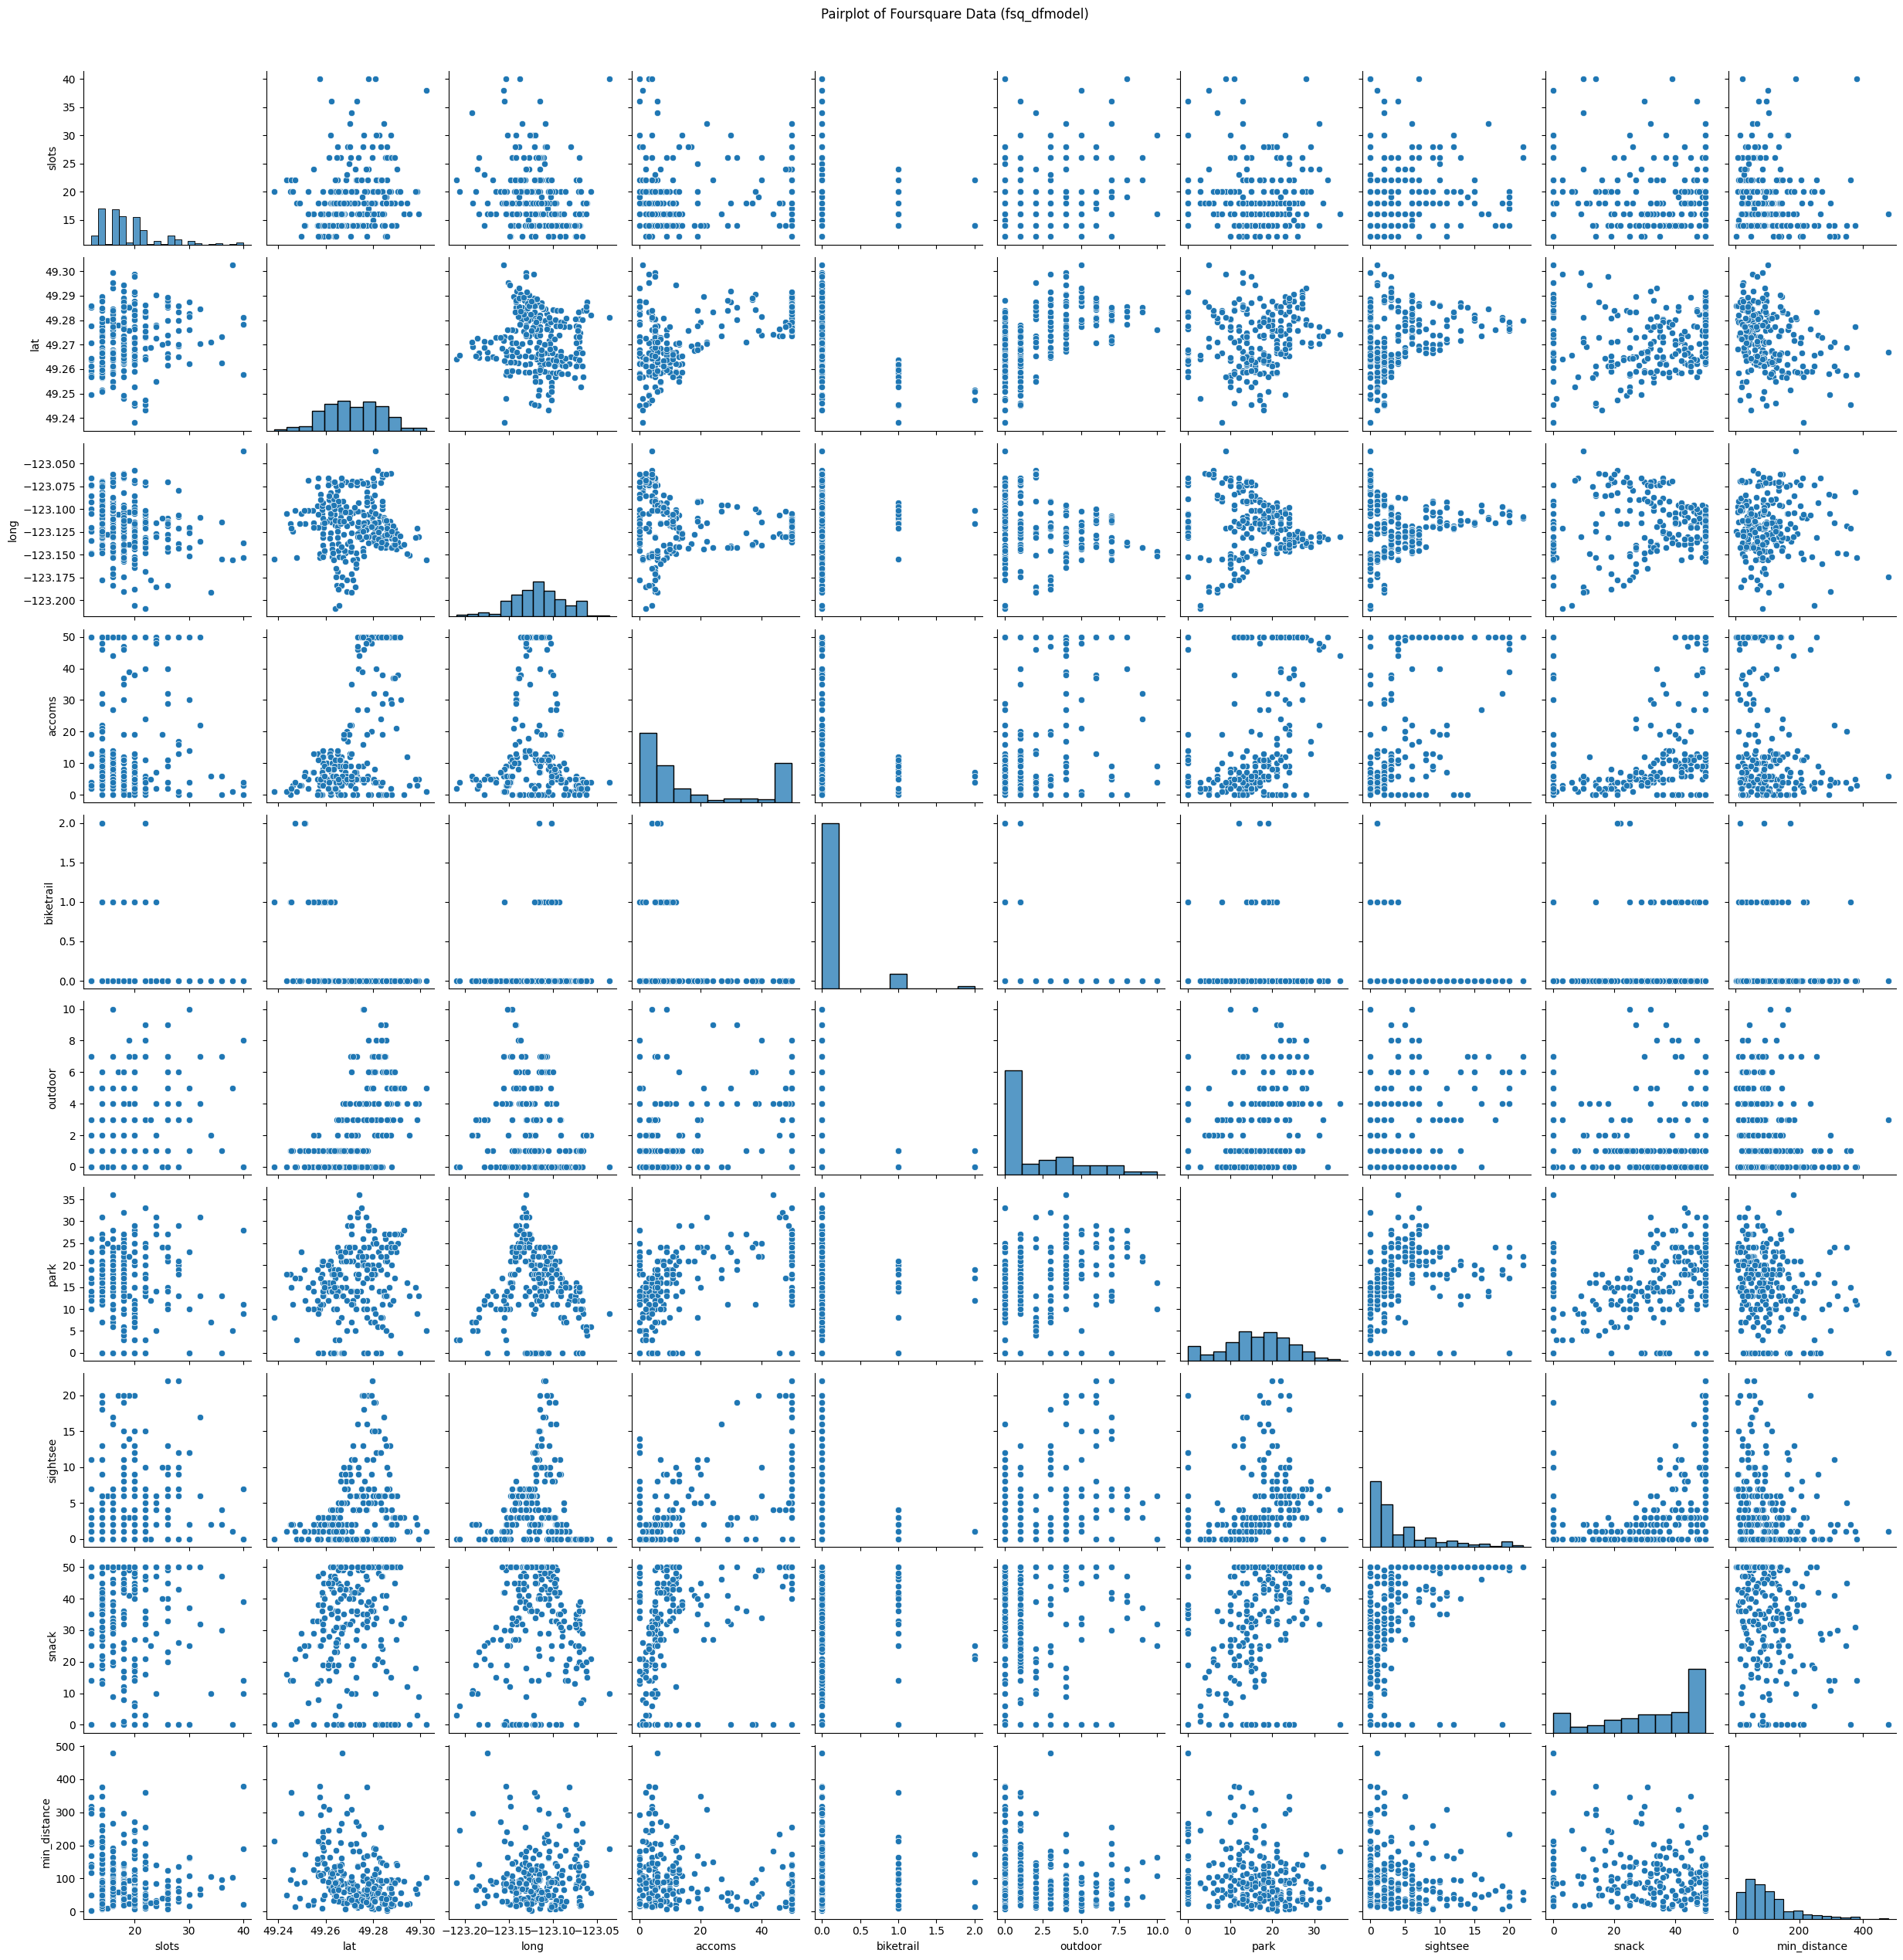

In [150]:
# Using a pairplot for a really quick overview of Foursquare data before modelling and choosing a set of x variables to build a linear regression
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.pairplot(data=fsq_dfmodel)
plot.fig.suptitle("Pairplot of Foursquare Data (fsq_dfmodel)", y=1.02)
plt.show()

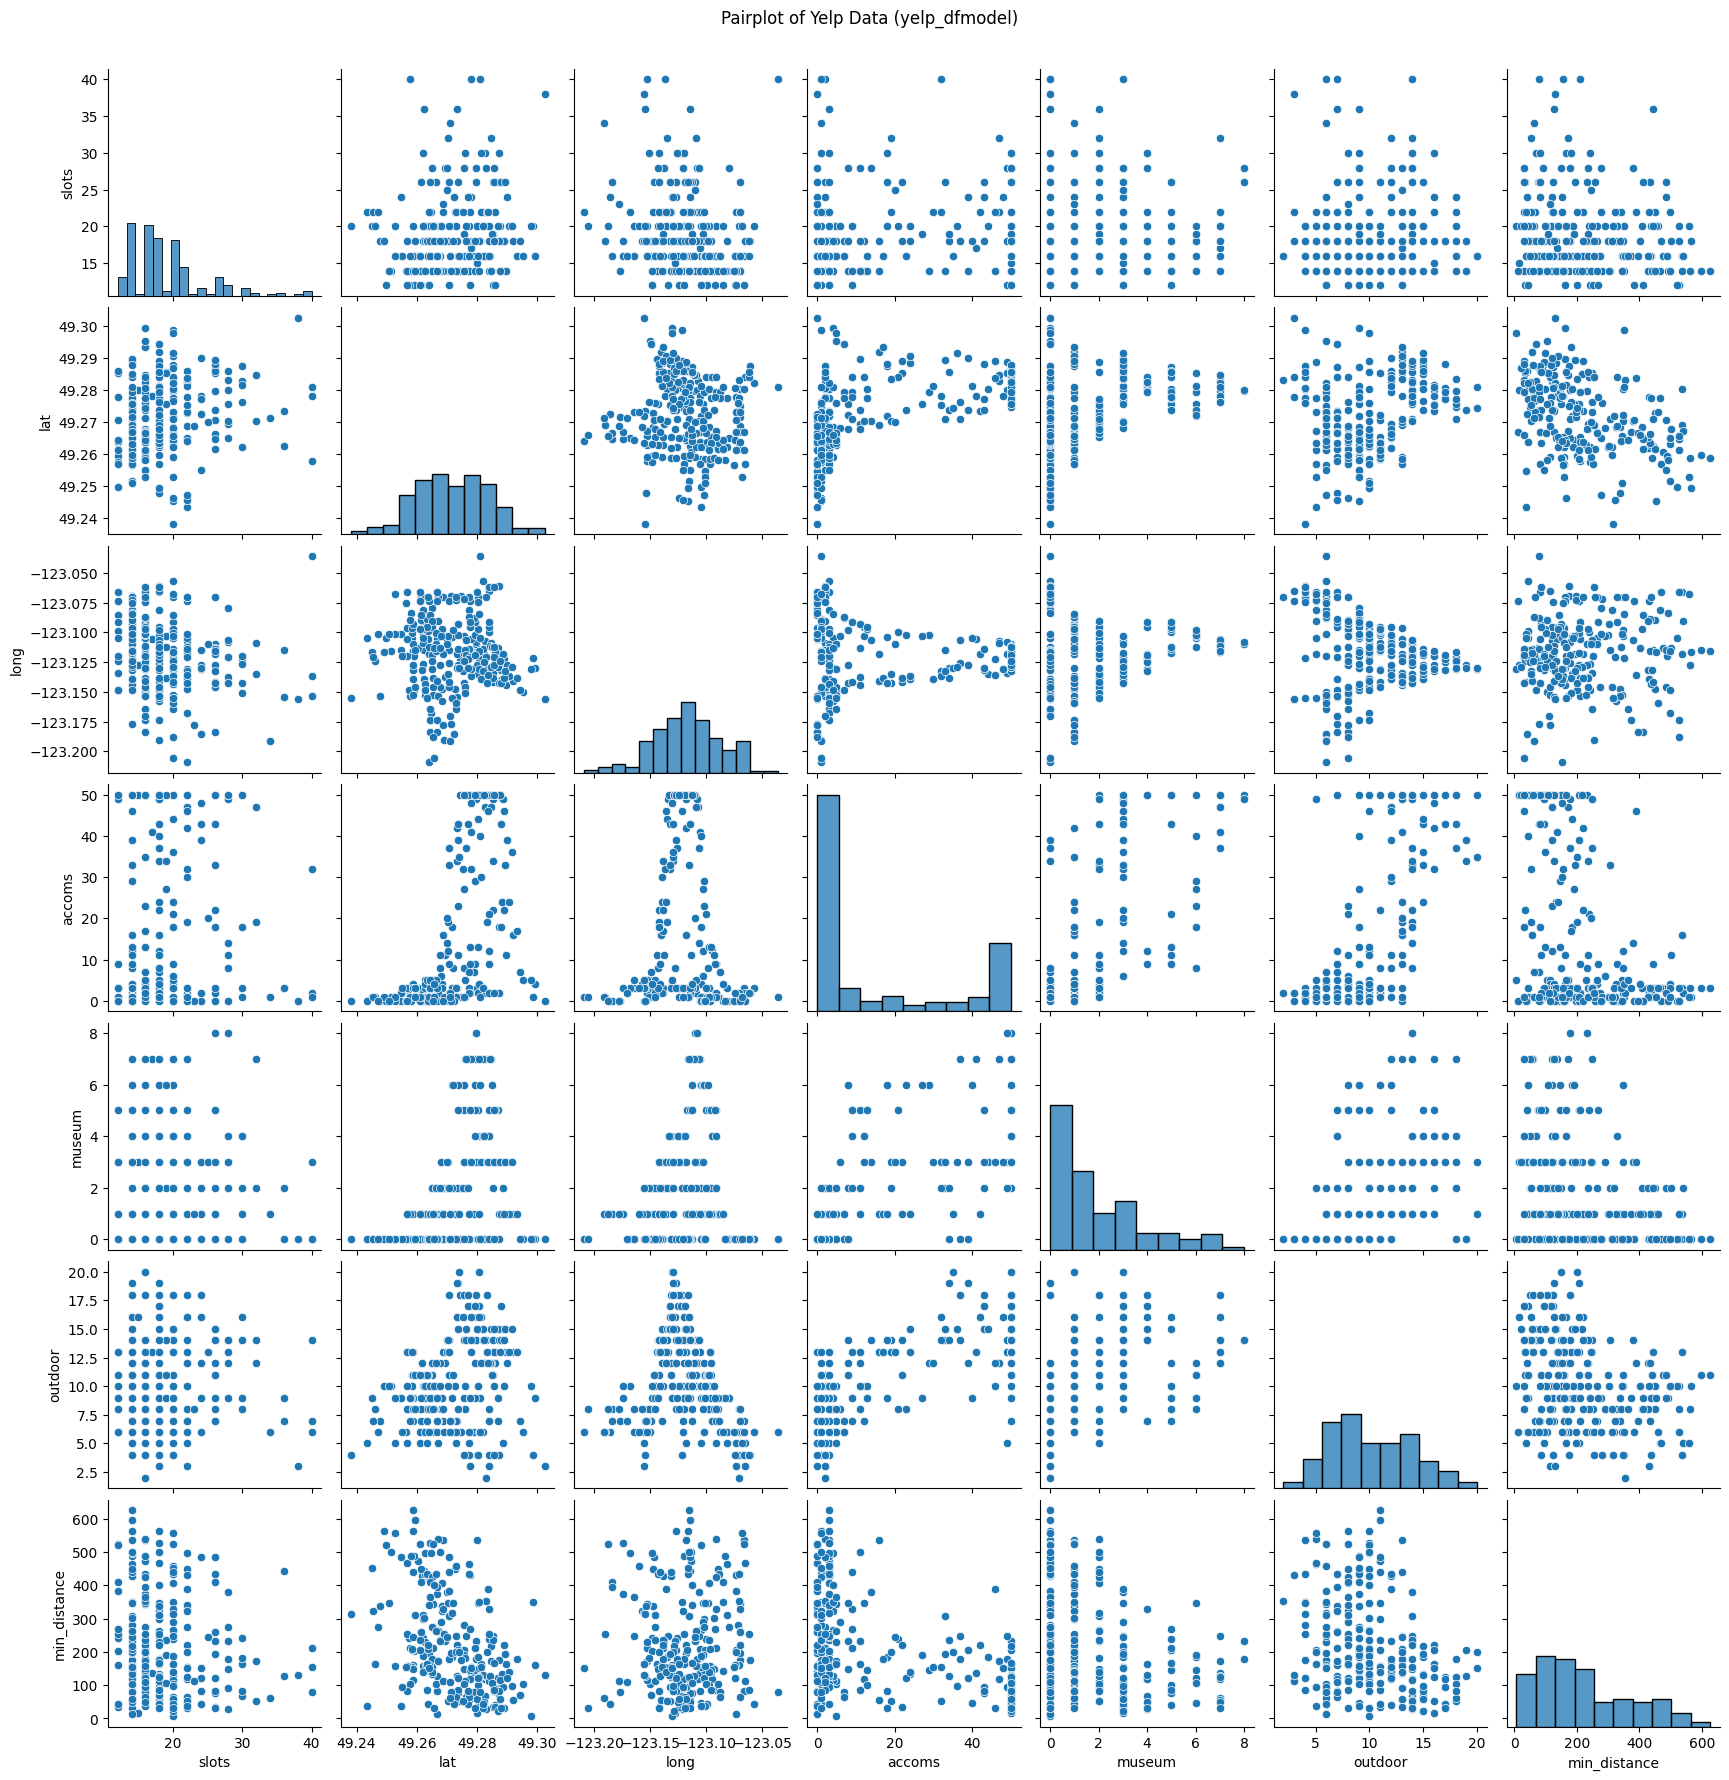

In [151]:
# Using a pairplot for a really quick overview of the Yelp data

plot = sns.pairplot(data=yelp_dfmodel)
plot.fig.suptitle("Pairplot of Yelp Data (yelp_dfmodel)", y=1.02)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

#### Julie's Notes

I have 4 dataframes that have been created in this notebook:
1. `yelp_poi_df_bikes`: table with all Yelp information with specific details for each POI, joined to Bikes information
2. `fsq_poi_df_bikes`: table with all Foursquare information with specific details for each POI, joined to Bikes information
3. `yelp_dfmodel`: pivoted/folded table useful for model building
4. `fsq_dfmodel`:  pivoted/folded table useful for model building

For this exercise, I will *only* store the `fsq_poi_df_bikes` dataframe into a SQLite DB.  The rationale here is as follows:
1. The Foursquare data had more categories simply due to the fact that their API limit was 40,000 over the month and not 500 per day (Yelp)
2. It is likely that doing further analysis, grouping, and slicing/dicing of the full dataset for Foursquare, might be have an audience with SQL experts and data analysts, rather than solely relying on Pandas transformations.  The value-add for putting this particular database into SQL is higher than any of the other databases.
3. Once this dataframe is put into SQL, it is a bit of a "rinse-and-repeat" to put the other dataframes into SQL, as desired.

I have put some thought into the structure of the table held in this database:
1. I used Python functions e.g. `fsq_poi_bikes_df['place_name'].str.len().max()` to easily determine the max length of a VARCHAR field in my table definition.
2. I used Python conditional structures, syntax and logic to replace "NaN" values in my dataframe with "N/A" values in my SQLite database.
    - I wanted to keep the "NaN" values in my dataframe because those are often easier to disinclude in masks or filters (e.g. with `pandas.isna())` or to data-clean ayer (e.g. with `pandas.fillna()`).
3. I use Python as the interface to also query the SQLite DB to ensure completeness of the DB (that all rows in my DB were written to SQLite) as well.

In [236]:
# Imports to work with sqlite3

import sqlite3
from sqlite3 import Error
from itertools import islice

In [237]:
# Function definitions used to create connection and execute SQL statements on, and get return information from, the local SQLite DB.
# Credit:  W04D05 SQL in Python Compass material and walkthrough

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [238]:
# Examine the data types for this dataframe, to inform the columns and datatypes for the SQLite DB
fsq_poi_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17961 entries, 0 to 18006
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_id           17961 non-null  object 
 1   station_name         17961 non-null  object 
 2   slots                17961 non-null  int64  
 3   lat                  17961 non-null  float64
 4   long                 17961 non-null  float64
 5   place_id             17961 non-null  object 
 6   place_name           17961 non-null  object 
 7   distance             17961 non-null  float64
 8   address              16292 non-null  object 
 9   city                 17683 non-null  object 
 10  postal               14318 non-null  object 
 11  category_id          17961 non-null  object 
 12  category_name        17961 non-null  object 
 13  query_categories     17961 non-null  object 
 14  query_category_text  17961 non-null  object 
dtypes: float64(3), int64(1), object(11)
memor

In [239]:
# Examine a sample of the data in each column of this dataframe, to inform the columns and datatypes for the SQLite DB
fsq_poi_bikes_df.head()

station_id   station_name  slots        lat  \
0  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
1  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
2  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
3  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   
4  7a19c49f486d7c0c02b3685d7b240448  10th & Cambie     36  49.262487   

         long                  place_id         place_name  distance  \
0 -123.114397  5583141f498eb130f5b54df6     Trans Am Totem     311.0   
1 -123.114397  532cd663498ee59ab1496004  eatART Foundation    3020.0   
2 -123.114397  4b1db335f964a520211424e3      Marulilu Cafe      96.0   
3 -123.114397  4c75baefdb52b1f7c5b979dc   Caffe Cittadella     336.0   
4 -123.114397  4aec909ff964a520ccc821e3      Milano Coffee     430.0   

                       address       city   postal  category_id  \
0            1283 Pacific Blvd  Vancouver  V6Z 2R6        10047   
1  180A 577 Great Northern Way  Vancouver      NaN        10047   
2              451W Broadway W  Vancouver  V5Y 1R4  13034|13263   
3                  2310 Ash St  Vancouver  V5Z 3C2  13035|13065   
4                156 8th Ave W  Vancouver  V5Y 1N2  13035|13065   

              category_name         query_categories  \
0                Public Art  10027,10047,10059,10069   
1                Public Art  10027,10047,10059,10069   
2  Café|Japanese Restaurant                    13032   
3    Coffee Shop|Restaurant                    13032   
4    Coffee Shop|Restaurant                    13032   

                               query_category_text  
0        Arts and Entertainment: Museum|Public Art  
1        Arts and Entertainment: Museum|Public Art  
2  Dining and Drinking: Cafe, Coffee and Tea House  
3  Dining and Drinking: Cafe, Coffee and Tea House  
4  Dining and Drinking: Cafe, Coffee and Tea House

In [240]:
# Define the table/CREATE TABLE SQL query to store this dataframe

table_name = 'fsq_poi_bikes'
sqlite_db_path = '../data/fsq_poi_bikes.db'

create_table_query = f"""
CREATE TABLE {table_name} (
    station_id varchar({fsq_poi_bikes_df['station_id'].str.len().max()}),
    station_name varchar({fsq_poi_bikes_df['station_name'].str.len().max()}),
    slots smallint,
    lat real,
    long real,
    place_id varchar({fsq_poi_bikes_df['place_id'].str.len().max()}),
    place_name varchar({fsq_poi_bikes_df['place_name'].str.len().max()}),
    distance real,
    address varchar({int(fsq_poi_bikes_df['address'].str.len().max())}),
    city varchar({int(fsq_poi_bikes_df['city'].str.len().max())}),
    postal varchar({int(fsq_poi_bikes_df['postal'].str.len().max())}),
    category_id varchar({fsq_poi_bikes_df['category_id'].str.len().max()}),
    category_name varchar({fsq_poi_bikes_df['category_name'].str.len().max()}),
    query_categories varchar({fsq_poi_bikes_df['query_categories'].str.len().max()}),
    query_category_text varchar({fsq_poi_bikes_df['query_category_text'].str.len().max()})
)
"""

print (create_table_query)


CREATE TABLE fsq_poi_bikes (
    station_id varchar(32),
    station_name varchar(51),
    slots smallint,
    lat real,
    long real,
    place_id varchar(24),
    place_name varchar(74),
    distance real,
    address varchar(32),
    city varchar(15),
    postal varchar(7),
    category_id varchar(35),
    category_name varchar(80),
    query_categories varchar(23),
    query_category_text varchar(59)
)



In [241]:
# Generate a list of all the INSERT INTO statements
# Code credit ChatGPT for the base structure and suggestion for df.iterrows() and list comprehensions.  I have made some tweaks to ChatGPT's suggestions and comments, variable names, etc.

def format_val(val):
    if pd.isna(val):
        return '"N/A"'
    if isinstance(val, (int, float)):
        return str(val)
    return f'"{val}"'

insert_statements = []

# Create 1 insert statement per row in the dataframe
for index, row in fsq_poi_bikes_df.iterrows():
#for index, row in islice(fsq_poi_bikes_df.iterrows(), 0, 4):  # Testing only
    columns = ', '.join(row.index)
    values = ','.join([format_val(val) for val in row])
    insert_statement = f"INSERT INTO {table_name} ({columns}) VALUES ({values});"
    insert_statements.append(insert_statement)

# Debug only
for statement in islice(insert_statements, 4):  # DEBUG - just look at 4 statements
#for statement in insert_statements:
    print (statement)
    print()

INSERT INTO fsq_poi_bikes (station_id, station_name, slots, lat, long, place_id, place_name, distance, address, city, postal, category_id, category_name, query_categories, query_category_text) VALUES ("7a19c49f486d7c0c02b3685d7b240448","10th & Cambie",36,49.262487,-123.114397,"5583141f498eb130f5b54df6","Trans Am Totem",311.0,"1283 Pacific Blvd","Vancouver","V6Z 2R6","10047","Public Art","10027,10047,10059,10069","Arts and Entertainment: Museum|Public Art");

INSERT INTO fsq_poi_bikes (station_id, station_name, slots, lat, long, place_id, place_name, distance, address, city, postal, category_id, category_name, query_categories, query_category_text) VALUES ("7a19c49f486d7c0c02b3685d7b240448","10th & Cambie",36,49.262487,-123.114397,"532cd663498ee59ab1496004","eatART Foundation",3020.0,"180A 577 Great Northern Way","Vancouver","N/A","10047","Public Art","10027,10047,10059,10069","Arts and Entertainment: Museum|Public Art");

INSERT INTO fsq_poi_bikes (station_id, station_name, slots, lat,

In [242]:
# Do the work!

# First, create the DB connection which will create the DB if it is not already there
connection = create_connection(sqlite_db_path)

Connection to SQLite DB successful


In [243]:
# Next, execute the CREATE TABLE query
execute_query(connection, create_table_query)

Query executed successfully


In [244]:
# Let's check the Information Schema to make sure the table was created!
check_info_schema_query = f"""
SELECT name
FROM sqlite_master
WHERE type = 'table' AND name = '{table_name}';
"""
db_response = execute_read_query(connection, check_info_schema_query)

for row in db_response:
    print(row)

('fsq_poi_bikes',)


In [245]:
# The table has been created, so do the inserts one at a time:
for statement in insert_statements:
    execute_query(connection, statement)

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed succe

In [246]:
# Let's check that all the data went in via COUNT!
select_from_table = f"""
SELECT COUNT(*)
FROM {table_name}
"""

db_response = execute_read_query(connection, select_from_table)

for row in db_response:
    print(row)

(17961,)


In [247]:
# How many rows are in the fsq_poi_bikes_df, again?
fsq_poi_bikes_df.shape[0]

17961

^^ Julie's Notes:  There are 17961 rows in the SQLite DB and there were 17961 rows in our DF, so things look good.

In [248]:
# Let's check that all the data went in via getting back al the rows (oiy!)
select_from_table = f"""
SELECT *
FROM {table_name}
"""

db_response = execute_read_query(connection, select_from_table)

for row in db_response:
    print(row)

('7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 36, 49.262487, -123.114397, '5583141f498eb130f5b54df6', 'Trans Am Totem', 311.0, '1283 Pacific Blvd', 'Vancouver', 'V6Z 2R6', '10047', 'Public Art', '10027,10047,10059,10069', 'Arts and Entertainment: Museum|Public Art')
('7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 36, 49.262487, -123.114397, '532cd663498ee59ab1496004', 'eatART Foundation', 3020.0, '180A 577 Great Northern Way', 'Vancouver', 'N/A', '10047', 'Public Art', '10027,10047,10059,10069', 'Arts and Entertainment: Museum|Public Art')
('7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 36, 49.262487, -123.114397, '4b1db335f964a520211424e3', 'Marulilu Cafe', 96.0, '451W Broadway W', 'Vancouver', 'V5Y 1R4', '13034|13263', 'Café|Japanese Restaurant', '13032', 'Dining and Drinking: Cafe, Coffee and Tea House')
('7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 36, 49.262487, -123.114397, '4c75baefdb52b1f7c5b979dc', 'Caffe Cittadella', 336.0, '2310 Ash St', 'Vancouve

In [249]:
# Commit and Close the SQLite DB connection when done
connection.commit()
connection.close()

Look at the data before and after the join to validate your data.

##### Julie's Answer:

Please see all the cells above, where I go through painstaking amounts of validation in between cells to validate everything looks good after every set of joins (I spared the reader of all the execution of those cells, but the validation is how I concluded I needed to drop duplicate columns, and fillna and cast from float to int after all the various joins!)